<a href="https://colab.research.google.com/github/TheSmilingSky/SOC-20-Un-structured/blob/team-3/Data_pre_processing_and_loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.patches as patches
import xml.etree.ElementTree as ET
%matplotlib inline

Loading the Street View Text dataset

In [3]:
!wget http://vision.ucsd.edu/~kai/svt/svt.zip

--2020-04-29 08:44:09--  http://vision.ucsd.edu/~kai/svt/svt.zip
Resolving vision.ucsd.edu (vision.ucsd.edu)... 132.239.95.98
Connecting to vision.ucsd.edu (vision.ucsd.edu)|132.239.95.98|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118258652 (113M) [application/zip]
Saving to: ‘svt.zip’

svt.zip             100%[===================>] 112.78M   616KB/s    in 3m 4s   

2020-04-29 08:47:13 (629 KB/s) - ‘svt.zip’ saved [118258652/118258652]



Unzipping the dataset

In [4]:
!unzip svt.zip

Archive:  svt.zip
   creating: svt1/
   creating: svt1/img/
  inflating: svt1/img/00_00.jpg      
   creating: __MACOSX/
   creating: __MACOSX/svt1/
   creating: __MACOSX/svt1/img/
  inflating: __MACOSX/svt1/img/._00_00.jpg  
  inflating: svt1/img/00_01.jpg      
  inflating: __MACOSX/svt1/img/._00_01.jpg  
  inflating: svt1/img/00_02.jpg      
  inflating: __MACOSX/svt1/img/._00_02.jpg  
  inflating: svt1/img/00_03.jpg      
  inflating: __MACOSX/svt1/img/._00_03.jpg  
  inflating: svt1/img/00_04.jpg      
  inflating: __MACOSX/svt1/img/._00_04.jpg  
  inflating: svt1/img/00_05.jpg      
  inflating: __MACOSX/svt1/img/._00_05.jpg  
  inflating: svt1/img/00_06.jpg      
  inflating: __MACOSX/svt1/img/._00_06.jpg  
  inflating: svt1/img/00_07.jpg      
  inflating: __MACOSX/svt1/img/._00_07.jpg  
  inflating: svt1/img/00_08.jpg      
  inflating: __MACOSX/svt1/img/._00_08.jpg  
  inflating: svt1/img/00_09.jpg      
  inflating: __MACOSX/svt1/img/._00_09.jpg  
  inflating: svt1/img/00_10

In [45]:
rm /content/svt1/img/08_14.jpg #Removing the image as it doesn't have necessary labels

rm: cannot remove '/content/svt1/img/08_14.jpg': No such file or directory


In [0]:
cd svt1 #changong the directory

In [0]:
resize = 400 # value to change the image into square of required size

Converting the labels from xml to txt files

In [0]:
tree = ET.parse('/content/svt1/test.xml')

root = tree.getroot()

dat3 = {}
for box in root.findall('.//image'):
  bounding_boxes = []
  key = box.find('.//imageName').text
  size = list(box.find('.//Resolution').attrib.values())
  for bound in box.findall('.//taggedRectangle'):
    bounding_box = list(bound.attrib.values())
    bounding_box[0] = (int(bounding_box[0]) * resize) / int(size[1])
    bounding_box[1] = (int(bounding_box[1]) * resize) / int(size[0])
    bounding_box[2] = (int(bounding_box[2]) * resize) / int(size[0])
    bounding_box[3] = (int(bounding_box[3]) * resize) / int(size[1])
    my_order = [2, 3, 1, 0]
    bounding_box = [bounding_box[i] for i in my_order]
    bounding_boxes.append(bounding_box)
  dat3[str(key)] = bounding_boxes


for i in dat3:
  with open('/content/svt1/' + i[:-4] + '.txt','w') as f:
    for sublist in dat3[i]:
      f.write(str(1) + ' ')
      for item in sublist:
        if (item == sublist[-1]):
          f.write(str(item))
        else:
          f.write(str(item) + ' ')
      f.write('\n')


In [0]:
tree = ET.parse('/content/svt1/train.xml')

root = tree.getroot()

dat3 = {}
for box in root.findall('.//image'):
  bounding_boxes = []
  key = box.find('.//imageName').text
  size = list(box.find('.//Resolution').attrib.values())
  for bound in box.findall('.//taggedRectangle'):
    bounding_box = list(bound.attrib.values())
    bounding_box[0] = (int(bounding_box[0]) * resize) / int(size[1])
    bounding_box[1] = (int(bounding_box[1]) * resize) / int(size[0])
    bounding_box[2] = (int(bounding_box[2]) * resize) / int(size[0])
    bounding_box[3] = (int(bounding_box[3]) * resize) / int(size[1])
    my_order = [2, 3, 1, 0]
    bounding_box = [bounding_box[i] for i in my_order]
    bounding_boxes.append(bounding_box)
  dat3[str(key)] = bounding_boxes


for i in dat3:
  with open('/content/svt1/' + i[:-4] + '.txt','w') as f:
    for sublist in dat3[i]:
      f.write(str(1) + ' ')
      for item in sublist:
        if (item == sublist[-1]):
          f.write(str(item))
        else:
          f.write(str(item) + ' ')
      f.write('\n')

In [49]:
#Removing the following files as they have some error
rm /content/svt1/img/19_00.jpg
rm /content/svt1/img/19_00.txt

SyntaxError: ignored

In [0]:
path = '/content/svt1/img' #Assigning the path to images

Data Loading

In [0]:
images = []
texts = []
for file in os.listdir(path):
    if file[-3:] == 'jpg':
        images.append(file)
    elif file[-3:] == 'txt':
        texts.append(file)
    else:
        print('Exception')

In [0]:
images.sort()
texts.sort()

Pre-processing:


Resizing and adding gaussian blur to the images

In [0]:
data = np.zeros((len(images), resize, resize))
ct = 0
for img in images:
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    res = cv2.resize(img_array, (resize, resize), interpolation=cv2.INTER_LINEAR)
    blur = cv2.GaussianBlur(res, (5, 5), 0)
    data[ct] = blur
    ct+=1

Loading labels from the text files

In [0]:
text_no = 9     #This is the maximum number of texts that can be detected in the image
labels = np.zeros((len(texts), 9, 5))

ct = 0
for text in texts:
    label_temp = np.loadtxt(os.path.join(path, text),skiprows=0)
    if len(label_temp.shape) == 1:
        labels[ct, 0] = label_temp
    else:
        for i in range(label_temp.shape[0]):
            labels[ct, i] = label_temp[i, :]
    ct+=1   

Visualising the processed image along with labels

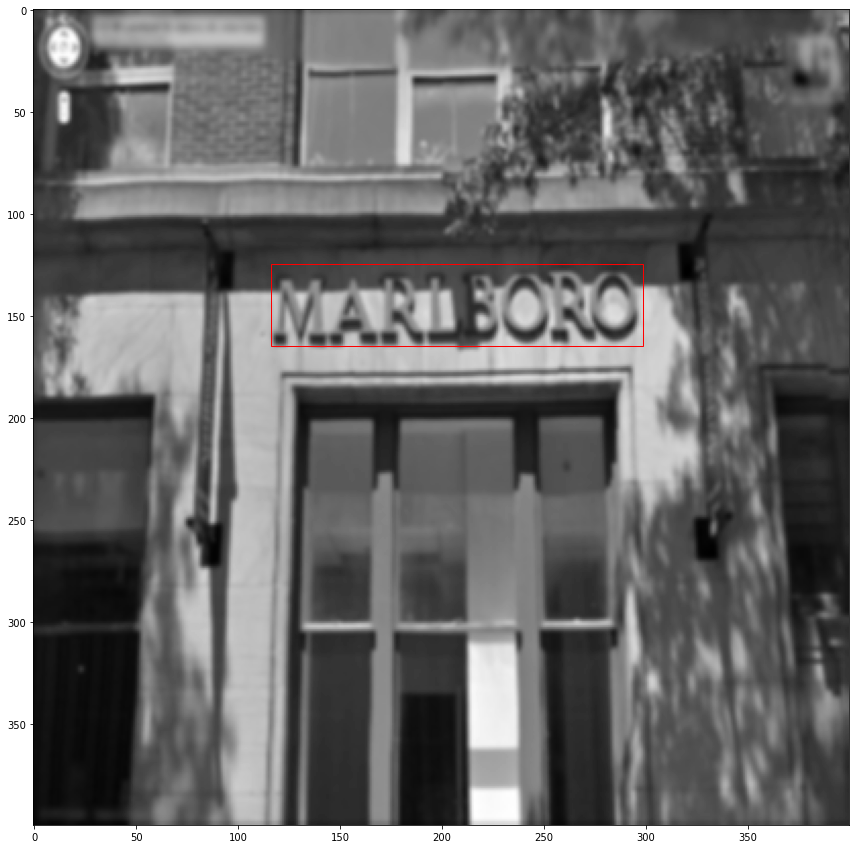

In [44]:
image_no = 42 # Change this number from 0-347 to load different images

fig,ax = plt.subplots(1, figsize = (15, 15))

# Display the image
ax.imshow(data[image_no], cmap = 'gray')

# Create a Rectangle patch
for i in range(labels.shape[1]):
    if labels[image_no, i, 0] == 1:
        rect = patches.Rectangle((labels[image_no, i, 1], labels[image_no, i, 2]), labels[image_no, i, 3], labels[image_no, i, 4],linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)

# Add the patch to the Axes
plt.show()

Loading the image data and labels into numpy arrays to feed into the network

In [0]:
X = data.reshape(len(images), -1)
y = labels.reshape(len(texts), -1)

In [47]:
X.shape

(348, 160000)

In [48]:
y.shape

(348, 45)